## Problem Statement:
### Use Multiple Linear Regression to  Build a model that will predict housing values in Boston suburbs using various predictor variables that you have available using boston.csv dataset with the median value(MV) of owner-occupied homes as the target variable and the rest as predictors.

### Dataset Description
<li> CRIM - per capita crime rate by town </li>
<li>INDUS - proportion of non-retail business acres per town.</li>
<li>NOX - nitric oxides concentration (parts per 10 million)</li>
<li>RM - average number of rooms per dwelling</li>
<li>AGE - proportion of owner-occupied units built prior to 1940</li>
<li>DIS - weighted distances to five Boston employment centres</li>
<li>TAX - full-value property-tax rate per $10,000</li>
<li>PT - pupil-teacher ratio by town</li>

<li>B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
<li>MV - Median value of owner-occupied homes in $1000's</li>

#### Importing Packages for Pre Analysis 

In [2]:
import os
import pandas as pd
from pandas import DataFrame
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading Data for Analysis and Building Model


In [3]:
boston=pd.read_csv("C:\\Users\\ARPIT\\Desktop\\UC-14000\\boston.csv") #Importing Data

In [4]:
pd.options.display.float_format = '{:.2f}'.format
print(boston.shape)     #Checking rows and Column
print(boston.head())    #Checking the data firts 5 Columns 

(506, 10)
   CRIM  INDUS  NOX   RM   AGE  DIS  TAX    PT      B    MV
0  0.01   2.31 0.54 6.57 65.20 4.09  296 15.30 396.90 24.00
1  0.03   7.07 0.47 6.42 78.90 4.97  242 17.80 396.90 21.60
2  0.03   7.07 0.47 7.18 61.10 4.97  242 17.80 392.83 34.70
3  0.03   2.18 0.46 7.00 45.80 6.06  222 18.70 394.63 33.40
4  0.07   2.18 0.46 7.15 54.20 6.06  222 18.70 396.90 36.20


In [5]:
boston.info()  #Checking for Nulls and Datatypes of each Predictors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   INDUS   506 non-null    float64
 2   NOX     506 non-null    float64
 3   RM      506 non-null    float64
 4   AGE     506 non-null    float64
 5   DIS     506 non-null    float64
 6   TAX     506 non-null    int64  
 7   PT      506 non-null    float64
 8   B       506 non-null    float64
 9   MV      506 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 39.7 KB


#### Getting Summary Statistics of Dataset


In [6]:
pd.options.display.float_format = '{:.4f}'.format
boston.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.1368,0.5547,6.2846,68.5749,3.7950,408.2372,18.4555,356.6740,22.5328
std,8.6015,6.8604,0.1159,0.7026,28.1489,2.1057,168.5371,2.1649,91.2949,9.1971
min,0.0063,0.4600,0.3850,3.5610,2.9000,1.1296,187.0000,12.6000,0.3200,5.0000
25%,0.0820,5.1900,0.4490,5.8855,45.0250,2.1002,279.0000,17.4000,375.3775,17.0250
50%,0.2565,9.6900,0.5380,6.2085,77.5000,3.2074,330.0000,19.0500,391.4400,21.2000
75%,3.6771,18.1000,0.6240,6.6235,94.0750,5.1884,666.0000,20.2000,396.2250,25.0000
max,88.9762,27.7400,0.8710,8.7800,100.0000,12.1265,711.0000,22.0000,396.9000,50.0000


### Result of  Summary Statistics for Boston Dataset and Boxplot to show the Outliers

Using .describe() in the dataframe we get the summary ststistics of whole dataset where we can make following infrenece by looking at mean, max and 75%  of data that  75 % data is around mean wheras maximum is 88.97 in CRIM column with which we can  say there are outliers present in this predictors.
In cloumn named B we can seee min value as 0.32 and Max value as 396.89 and Mean and 75% of data are close to 396.89 with which we can infer that there will be outliers in lower side of Quartile.
This will be more clear when we Plot a Boxplot using matplotlib library.

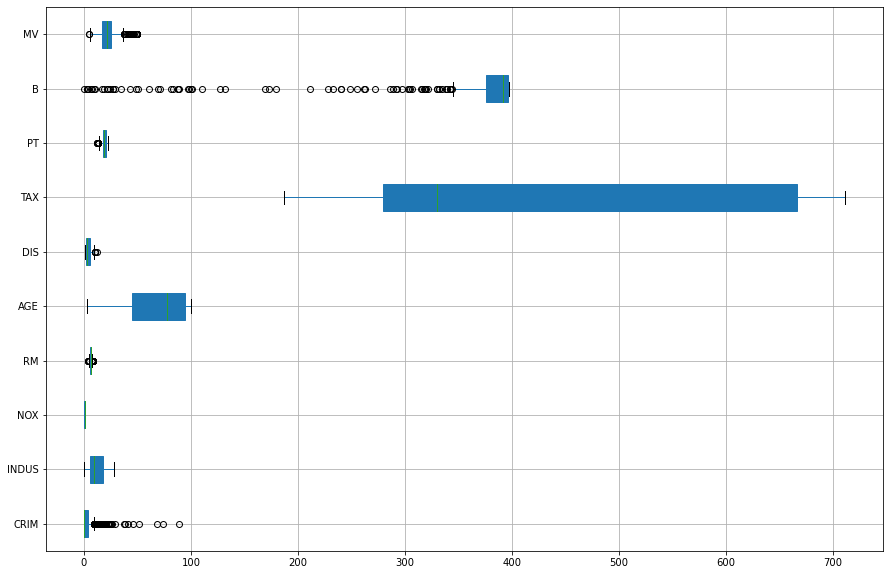

In [7]:
plt.figure(figsize=(15,10))
boston.boxplot(patch_artist=True,vert=False)

#### Checking the Outliers Percentage in Each Columns

In [8]:
for k, v in boston.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(boston)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column INDUS outliers = 0.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column TAX outliers = 0.00%
Column PT outliers = 2.96%
Column B outliers = 15.22%
Column MV outliers = 7.91%


#### Correlation Matrix and Heatmap Showing correlation between Predictors and Target Variables


In [9]:
pd.options.display.float_format = '{:.4f}'.format
my_corr=boston.corr()
my_corr

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
CRIM,1.0000,0.4066,0.4210,-0.2192,0.3527,-0.3797,0.5828,0.2899,-0.3851,-0.3883
INDUS,0.4066,1.0000,0.7637,-0.3917,0.6448,-0.7080,0.7208,0.3832,-0.3570,-0.4837
NOX,0.4210,0.7637,1.0000,-0.3022,0.7315,-0.7692,0.6680,0.1889,-0.3801,-0.4273
RM,-0.2192,-0.3917,-0.3022,1.0000,-0.2403,0.2052,-0.2920,-0.3555,0.1281,0.6954
AGE,0.3527,0.6448,0.7315,-0.2403,1.0000,-0.7479,0.5065,0.2615,-0.2735,-0.3770
DIS,-0.3797,-0.7080,-0.7692,0.2052,-0.7479,1.0000,-0.5344,-0.2325,0.2915,0.2499
TAX,0.5828,0.7208,0.6680,-0.2920,0.5065,-0.5344,1.0000,0.4609,-0.4418,-0.4685
PT,0.2899,0.3832,0.1889,-0.3555,0.2615,-0.2325,0.4609,1.0000,-0.1774,-0.5078
B,-0.3851,-0.3570,-0.3801,0.1281,-0.2735,0.2915,-0.4418,-0.1774,1.0000,0.3335
MV,-0.3883,-0.4837,-0.4273,0.6954,-0.3770,0.2499,-0.4685,-0.5078,0.3335,1.0000


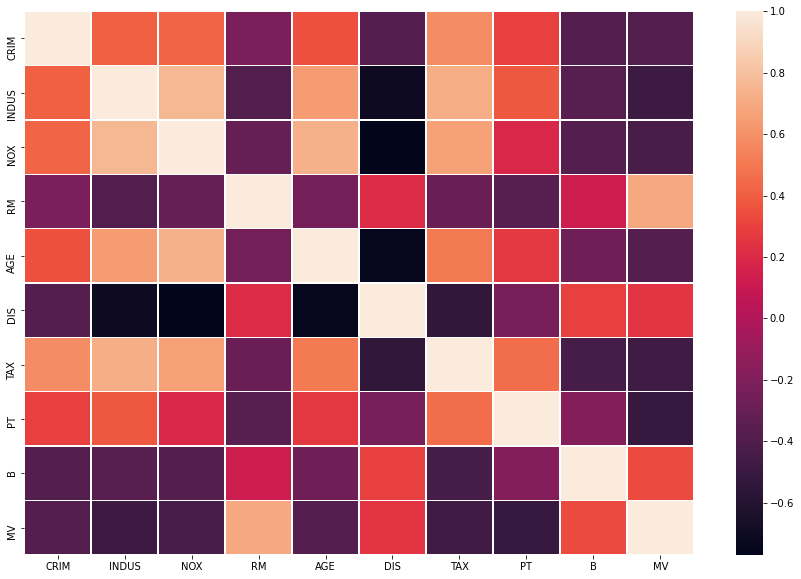

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(my_corr,linewidth=0.5)
plt.show()

### Hypothesis Testing

**Consideration for Conducting Hypothesis Testing**

**Null Hypothesis: $H_0$** :No Significant predictions of Median value of Houses in Boston by  Predictors('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PT', 'B'). 

**Alternative Hypothesis: $H_a$** : Yes, there is Significant predictions of Median value of Houses in Boston by  Predictors('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PT', 'B'). 

**Significance Level : 5%**

**Confidence Level : 95%**

Calculating Pearson Correlation and P-value to check which predictors are significant and which are not.

Distribution Plot with Histogram has been plotted to view the distribution of Predicted Columns

The Pearson Correlation Coefficient of CRIM is -0.3883046116575091  with a P-value of P = 1.1739862423663313e-19


(0.0, 54.07676982149646)

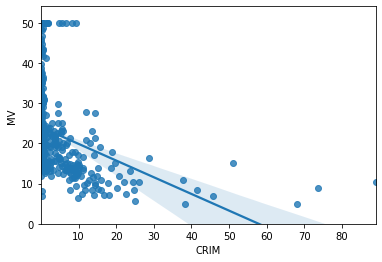

In [11]:
pearson_coef, p_value = stats.pearsonr(boston['CRIM'], boston['MV'])
print("The Pearson Correlation Coefficient of CRIM is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="CRIM", y="MV", data=boston)
plt.ylim(0,)

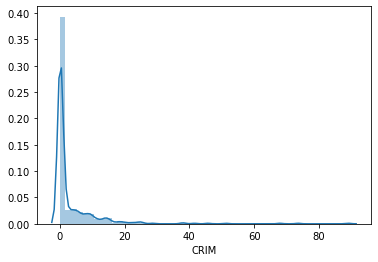

In [12]:
sns.distplot(boston['CRIM'])       # We can see that CRIM data is Positevely Skewed and also has an outliers

The Pearson Correlation Coefficient of INDUS is -0.4837251712814335  with a P-value of P = 4.900242319351878e-31


(0.0, 52.25)

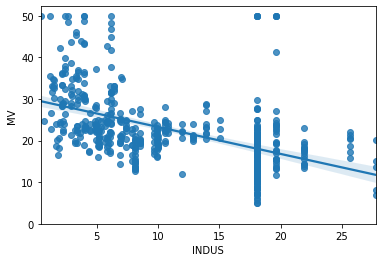

In [13]:
pearson_coef, p_value = stats.pearsonr(boston['INDUS'], boston['MV'])
print("The Pearson Correlation Coefficient of INDUS is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="INDUS", y="MV", data=boston)
plt.ylim(0,)

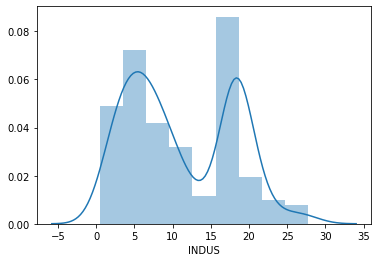

In [14]:
sns.distplot(boston['INDUS'])                  # this predictor shows Multimodal Distribution  

The Pearson Correlation Coefficient of NOX is -0.4273207763683765  with a P-value of P = 7.06503408465202e-24


(0.0, 52.25)

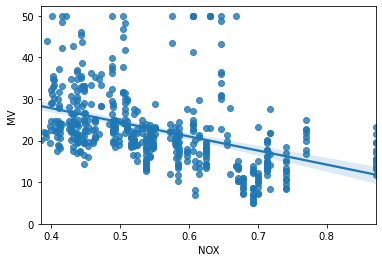

In [15]:
pearson_coef, p_value = stats.pearsonr(boston['NOX'], boston['MV'])
print("The Pearson Correlation Coefficient of NOX is", pearson_coef, " with a P-value of P =", p_value) 
sns.regplot(x="NOX", y="MV", data=boston)
plt.ylim(0,)

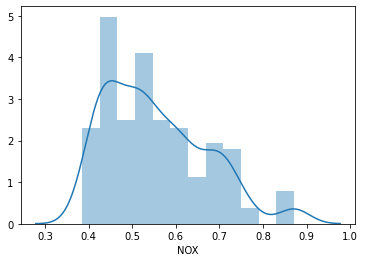

In [16]:
sns.distplot(boston['NOX'])     

The Pearson Correlation Coefficient of RM is 0.695359937127267  with a P-value of P = 2.4872456897496148e-74


(0.0, 52.785212424074025)

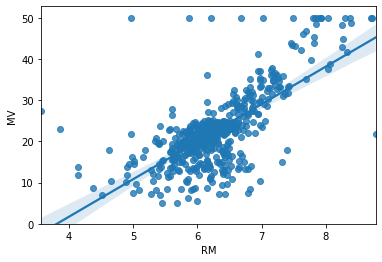

In [17]:
pearson_coef, p_value = stats.pearsonr(boston['RM'], boston['MV'])
print("The Pearson Correlation Coefficient of RM is", pearson_coef, " with a P-value of P =", p_value) 
sns.regplot(x="RM", y="MV", data=boston)
plt.ylim(0,)

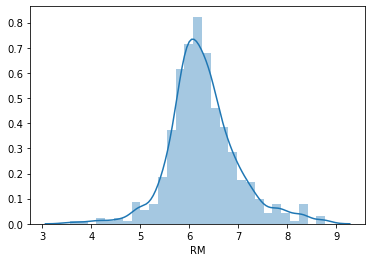

In [18]:
sns.distplot(boston['RM'])          # This distribution seems Normally distributed 

The Pearson Correlation Coefficient of AGE is -0.37695456714288655  with a P-value of P = 1.5699814570835983e-18


(0.0, 52.25)

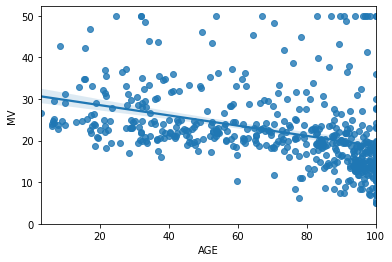

In [19]:
pearson_coef, p_value = stats.pearsonr(boston['AGE'], boston['MV'])
print("The Pearson Correlation Coefficient of AGE is", pearson_coef, " with a P-value of P =", p_value) 
sns.regplot(x="AGE", y="MV", data=boston)
plt.ylim(0,)

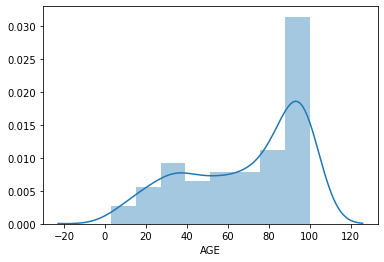

In [20]:
sns.distplot(boston['AGE'])

The Pearson Correlation Coefficient of DIS is 0.24992873873512159  with a P-value of P = 1.206610952424503e-08


(0.0, 52.25)

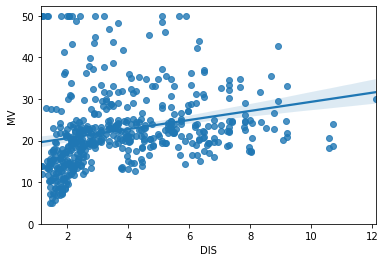

In [21]:
pearson_coef, p_value = stats.pearsonr(boston['DIS'], boston['MV'])
print("The Pearson Correlation Coefficient of DIS is", pearson_coef, " with a P-value of P =", p_value) 
sns.regplot(x="DIS", y="MV", data=boston)
plt.ylim(0,)

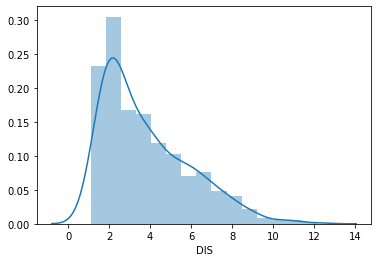

In [22]:
sns.distplot(boston['DIS'])

The Pearson Correlation Coefficient of TAX is -0.46853593528654547  with a P-value of P = 5.637730675534297e-29


(0.0, 52.25)

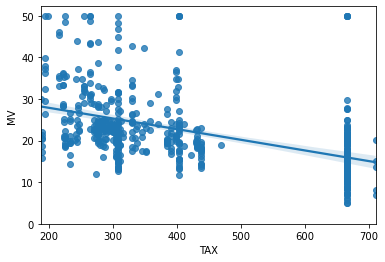

In [23]:
pearson_coef, p_value = stats.pearsonr(boston['TAX'], boston['MV'])
print("The Pearson Correlation Coefficient of TAX is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="TAX", y="MV", data=boston)
plt.ylim(0,)

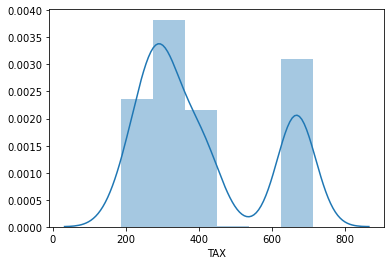

In [24]:
sns.distplot(boston['TAX'])    # Multimodal Distribution

The Pearson Correlation Coefficient of PT is -0.5077867038116088  with a P-value of P = 1.609499278902899e-34


(0.0, 52.25)

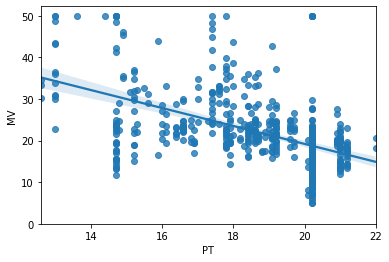

In [25]:
pearson_coef, p_value = stats.pearsonr(boston['PT'], boston['MV'])
print("The Pearson Correlation Coefficient of PT is", pearson_coef, " with a P-value of P =", p_value) 
sns.regplot(x="PT", y="MV", data=boston)
plt.ylim(0,)

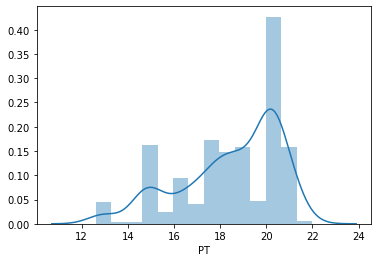

In [26]:
sns.distplot(boston['PT'])

The Pearson Correlation Coefficient of B is 0.3334608226834166  with a P-value of P = 1.3181119682130765e-14


(0.0, 52.25)

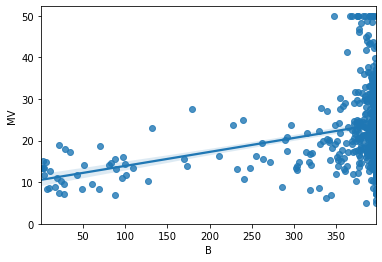

In [27]:
pearson_coef, p_value = stats.pearsonr(boston['B'], boston['MV'])
print("The Pearson Correlation Coefficient of B is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="B", y="MV", data=boston)
plt.ylim(0,)

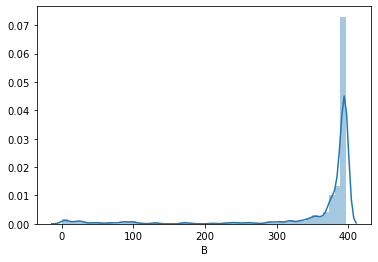

In [28]:
sns.distplot(boston['B'])

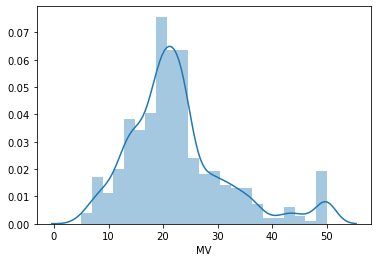

In [29]:
sns.distplot(boston['MV'])     # Distribution of Target Variable 

In [30]:
Corr_result=[['CRIM',-0.3883046116575091,1.1739862423663313e-19], ['INDUS',-0.4837251712814335,4.900242319351878e-31], ['NOX',-0.4273207763683765,7.06503408465202e-24], ['RM',0.695359937127267,2.4872456897496148e-74], ['AGE',-0.37695456714288655,1.5699814570835983e-18], ['DIS',0.24992873873512159,1.206610952424503e-08], ['TAX',-0.46853593528654547,5.637730675534297e-29], ['PT',-0.5077867038116088,1.609499278902899e-34], ['B',0.3334608226834166,1.3181119682130765e-14]]
Pearson_Pvalue = pd.DataFrame(Corr_result, columns = ['Predictors', 'pearson_Correlation','P-value'])
pd.options.display.float_format = '{:.5f}'.format
Pearson_Pvalue 

,Predictors,pearson_Correlation,P-value
0,CRIM,-0.38830,0.00000
1,INDUS,-0.48373,0.00000
2,NOX,-0.42732,0.00000
3,RM,0.69536,0.00000
4,AGE,-0.37695,0.00000
5,DIS,0.24993,0.00000
6,TAX,-0.46854,0.00000
7,PT,-0.50779,0.00000
8,B,0.33346,0.00000


### Summary of Above Hypothesis Testing:
From the above **Hypothesis Testing** result conducted separately with each predictor with target variable, with  **95% Confidence** and at 5% Significance level,  I can conclude that the **P-values** for all predictors are less than significance level and therefore **I reject the Null Hypothesis** which states that there is predictors cannot do predictions of Median value of Houses in Boston and therefore **I accept the Alternative Hypothesis** ststing that predictors can predict the Median value of Houses in Boston

In [31]:
#Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
X = add_constant(boston)
vifs = [vif(X.values, i) for i in range(len(X.columns))]
pd.Series(data=vifs, index=X.columns).sort_values(ascending=False)

const   493.92312
NOX       4.41187
INDUS     3.63752
DIS       3.58463
TAX       3.22346
MV        2.96106
AGE       2.76960
RM        2.06400
PT        1.70496
CRIM      1.64523
B         1.35639
dtype: float64

#### Checking for Multicollinearity in Multiple Regression
1. VIF starts at 1 and has no upper limit
2. VIF = 1, no correlation between the independent variable and the other variables
3. VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

Here we can see that all the predictors are having VIF values less than 5. But still there are some multicollinearity in data as we can see NOX, INDUS, DIS are close to 5

In [82]:
boston.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PT', 'B', 'MV'], dtype='object')

# Interpreting Coefficients 
$$ Yhat = a + b_1 CRIM + b_1 INDUS + b_2 NOX + b_3 RM + b_4 AGE + b_5 DIS + b_6 TAX + b_7 PT+ b_8 B $$

### Multiple Linear Regression using Scikit-Learn 

#### TRIAL 1(A) : running Model with dropping any Predictor using Scikit

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.drop("MV", axis=1), boston['MV'], test_size = 0.2,\
                                                    random_state=112)

Importing linear Regression Package

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
my_model = LinearRegression(normalize=True)  #Create an object of LinearRegression class.

In [36]:
my_model.fit(X_train, Y_train)               #Fitting the linear regression model to our training set.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [37]:
predictions = my_model.predict(X_test)       #Make predictions on the test set

In [38]:
pd.DataFrame({'actual value': Y_test, 'predictions':predictions}).sample(5)   #Compare a sample of 5 actual Y values from test set and corresponding predicted values 

,actual value,predictions
277,33.10000,30.66915
93,25.00000,26.24573
437,8.70000,12.42136
131,19.60000,18.85215
283,50.00000,41.65656


In [39]:
my_model.score(X_test, Y_test)           #Check the  R2  value

0.7256164320858525

In [40]:
my_model.coef_

array([-1.37617235e-01, -1.48717311e-01, -1.51124461e+01,  6.42314240e+00,
       -5.68869292e-02, -1.37695952e+00,  1.77836034e-03, -9.48321790e-01,
        1.01019361e-02])

In [41]:
my_model.intercept_

15.071858900917402

In [42]:
from sklearn import metrics

In [43]:
print('MAE',metrics.mean_absolute_error(Y_test,predictions))
print('MSE',metrics.mean_squared_error(Y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE 3.527748598537018
MSE 25.057161469613312
RMSE 5.00571288325782


Text(0, 0.5, 'Predicted_Y')

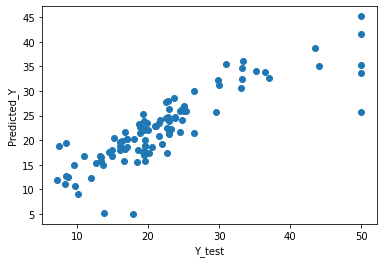

In [44]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y_test')
plt.ylabel('Predicted_Y')

### Multiple Linear Regression using statsmodels

#### TRIAL 1(B) : Running Model without dropping any Predictors

In [45]:
import statsmodels.api as sm         #Import statsmodels API

In [46]:
from sklearn.model_selection import train_test_split  #Divide the data into train and test sets

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.drop("MV", axis=1), boston['MV'], test_size = 0.2,\
                                                    random_state=112)

In [48]:
X_train = sm.add_constant(X_train)   #Add the constant term to the training data

In [49]:
my_model = sm.OLS(Y_train, X_train)  #Fit the OLS model

In [50]:
result = my_model.fit()

In [51]:
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     78.34
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           3.48e-82
Time:                        21:35:22   Log-Likelihood:                -1257.7
No. Observations:                 404   AIC:                             2535.
Df Residuals:                     394   BIC:                             2575.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0719      6.031      2.499      0.0

In [52]:
from sklearn.metrics import r2_score

In [53]:
predictions = result.predict(sm.add_constant(X_test))

In [54]:
r2_score(Y_test, predictions)

0.7256164320858531

In [55]:
print('MAE',metrics.mean_absolute_error(Y_test,predictions))
print('MSE',metrics.mean_squared_error(Y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE 3.5277485985370145
MSE 25.05716146961326
RMSE 5.005712883257814


Text(0, 0.5, 'Predicted_Y')

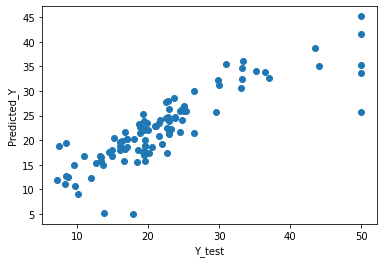

In [56]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y_test')
plt.ylabel('Predicted_Y')

Since P value of TAX & INDUS is high which is 54.9% and 5.6%. Which seems higher than the defined Significance Value therefore we will drop the TAX & INDUS and Re-Run the models.

#### TRIAL 2: DROPPING TAX COLUMN & THEN GETTING THE SCORE

In [57]:
X_train = X_train.drop("TAX", axis=1)

In [58]:
updated_model_result = sm.OLS(Y_train, X_train).fit()

In [59]:
print(updated_model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     88.23
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           4.28e-83
Time:                        21:35:36   Log-Likelihood:                -1257.9
No. Observations:                 404   AIC:                             2534.
Df Residuals:                     395   BIC:                             2570.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4115      5.925      2.432      0.0

In [60]:
from sklearn.metrics import r2_score

In [61]:
X_test = X_test.drop("TAX", axis=1)

In [62]:
predictions = updated_model_result.predict(sm.add_constant(X_test))

In [63]:
r2_score(Y_test, predictions)

0.7259104836332606

In [64]:
print('MAE',metrics.mean_absolute_error(Y_test,predictions))
print('MSE',metrics.mean_squared_error(Y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE 3.508617903749012
MSE 25.030308195709896
RMSE 5.003029901540655


Text(0, 0.5, 'Predicted_Y')

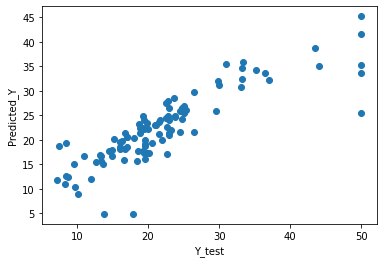

In [65]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y_test')
plt.ylabel('Predicted_Y')

#### TRIAL 3: DROPPING INDUS & TAX COLUMN AND THEN GETTING THE SCORE

In [66]:
X_train = X_train.drop("INDUS", axis=1)

In [67]:
updated_model_result1 = sm.OLS(Y_train, X_train).fit()

In [68]:
print(updated_model_result1.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     99.77
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           2.16e-83
Time:                        21:35:50   Log-Likelihood:                -1259.6
No. Observations:                 404   AIC:                             2535.
Df Residuals:                     396   BIC:                             2567.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4501      5.942      2.432      0.0

In [69]:
X_test = X_test.drop("INDUS", axis=1)

In [70]:
predictions = updated_model_result1.predict(sm.add_constant(X_test))

In [71]:
r2_score(Y_test, predictions)

0.734199332192343

In [72]:
print('MAE',metrics.mean_absolute_error(Y_test,predictions))
print('MSE',metrics.mean_squared_error(Y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE 3.462822477847541
MSE 24.27335682897541
RMSE 4.926799856801107


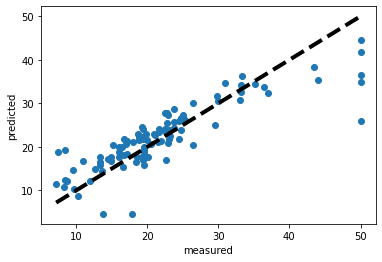

In [81]:
# Visual inspection of Measured and Predicted
fig, ax = plt.subplots()
ax.scatter(Y_test, predictions)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

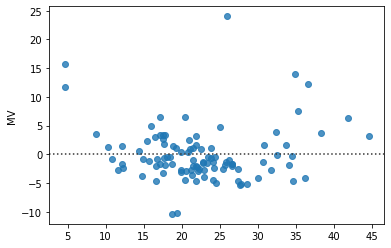

In [79]:
sns.residplot(predictions,Y_test)    # Residual Plot

The prediction made by the model is on the x-axis and the accuracy of the prediction is on the y-axis. The distance from the line at 0 is how bad the prediction was for that value.
Since…
Residual = Observed – Predicted
The positive values for the residual (on the y-axis) mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct.

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

#### CHECKING FOR MULTICOLLINEARITY USING VIF(variance_inflation_factor) 

While finding a Regression Score we have dropped TAX and INDUS Columns so lets drop manually and see what willbe the VIF Score 

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
X = add_constant(boston)
vifs = [vif(X.values, i) for i in range(len(X.columns))]
pd.Series(data=vifs, index=X.columns).sort_values(ascending=False)

const    493.923120
NOX        4.411872
INDUS      3.637522
DIS        3.584630
TAX        3.223459
MV         2.961055
AGE        2.769596
RM         2.063997
PT         1.704965
CRIM       1.645233
B          1.356394
dtype: float64

Identifying Multicollinearity in Multiple Regression
1. VIF starts at 1 and has no upper limit
2. VIF = 1, no correlation between the independent variable and the other variables
3. VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

Here we can see that all the predictors are having VIF values over 5 or 10 and thus we can say there is High Multicollinearity in data.

## Interpretation of Result on Basis of Final Model : Trial 3

# Interpreting Coefficients 
$$ Yhat = a + b_1 X_1 + b_3 X_3 + b_4 X_4 + b_5 X_5+ b_6 X_6+ b_8 X_8 + b_9 X_9 $$

$$
b_1 \ CRIM :-0.1313  \ For \ a \ Unit \ Decrease \ in \ CRIM.\ The \ Median \ value \ of \ house \ Increases \ by \ b_1*MV(1000$)) \\
b_3 \ NOX  :-17.6109 \ For \ a \ Unit \ Decrease \ in \ NOX. \ The \ Median \ value \ of \ house \ Increases \ by \ b_3*MV(1000$)) \\
b_4 \ RM   :+6.6400  \ For \ a \ Unit \ Increase \ in \ RM.  \ The \ Median \ value \ of \ house \ Increases \ by \ b_4*MV(1000$)) \\
b_5 \ AGE  :-0.0593  \ For \ a \ Unit \ Increase \ in \ AGE. \ The \ Median \ value \ of \ house \ Decreases \ by \ b_5*MV(1000$)) \\
b_6 \ DIS  :-1.2635  \ For \ a \ Unit \ Increase \ in \ DIS. \ The \ Median \ value \ of \ house \ Decreases \ by \ b_6*MV(1000$)) \\
b_8 \ PT   :-0.9857  \ For \ a \ Unit \ Decrease \ in \ PT . \ The \ Median \ value \ of \ house \ Decreases \ by \ b_8*MV(1000$)) \\
b_9 \ B    :+0.0105  \ For \ a \ Unit \ Increase \ in \ B.   \ The \ Median \ value \ of \ house \ Increases \ by \ b_9*MV(1000$)) \\
$$

**R-squared :** The R-squared value of the Final Model is **0.734199332192343**, which says that Mean prediction error is **73.4 %** smaller when we use Regression line than we employee the Mean.  
**OR**
**73.4%** of variance in MV(target variable) is explained by Predictors. 


**Adj. R-squared :** The **Adj. R-squared** value of the Final Model is **0.632**.Closer to **R-squared** So I cans ay we have included Relevant features.

**Prob(F-Statistic):** **2.16e-83** This tells the overall significance of the regression. This is to assess the significance level of all the variables together unlike the t-statistic that measures it for individual variables.Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is close to zero. This implies that overall the regressions is meaningful.

**AIC/BIC:** (Akaike’s Information Criteria/Bayesian information criteria) **2535/2567** which is least among above Trails of OLS Models. Thus we can say it is better model among the above iterations done.

**F-statistic:99.77**  & **Prob (F-statistic):2.16e-83** : F Statistics is used for accessing the Significance of overall regression model. 
Here: 

**Ho(Null Hypothesis): All coeffieients are 0 (i.e Model has no predictive capability)   
Ha(Alternative Hypothesis): Intercept only model is worse than Our current Model**

**Significance Value: 0.05**

So, In this case our P-Value is less than Significance Value. therefore we will reject Null Hypothesis and Accept the alternative hypothesis which says Our current Model is better than Intercept only Model. 
Also, F-Statistics is large. So we can say that there is linear relationship between Predictors and Target Varibales. 

**t-test**: 
**Ho: Coefficient of features is 0.**

**Ha: Coefficient of features not equal to 0.**

**Significance Value: 0.05**

On performing t-test we can see Higher the T-value higher the chance of rejecting the Null Hypothesis and accepting Alternative Hypothesis. In Trial 1(b) and Trial 2 we can see that  that P-value of some predictors is greater than Significance Value and therefore we drop those predictor.

**Durbin-Watson: 1.966** Here value lies between 0-2 so we can say that predictors shows weak positive correlation between predictors and Traget variables.

### Final Model

$$ Yhat = 14.4501 + (-0.1313)*CRIM + (-17.6109)*NOX + (6.6400)*RM + (-0.0593)*AGE + (-1.2635)*DIS + (-0.9857)*PT + (0.0105)*B $$

In [77]:
Model_Iterations=[['Trial 1(a)',0.7256164320858531,3.527748598537018,25.057161469613312, 5.00571288325782], ['Trial 1(b)',0.7256164320858531,3.5277485985370145,25.05716146961326, 5.005712883257814], ['Trial 2',0.7259104836332606,3.508617903749012,25.030308195709896,5.003029901540655], ['Trial 3',0.734199332192343,3.462822477847541,24.27335682897541,4.926799856801107]]
Scores = pd.DataFrame(Model_Iterations, columns = ['Iterations','R-square_Score','MAE', 'MSE','RMSE '])
pd.options.display.float_format = '{:.5f}'.format
Scores

,Iterations,R-square_Score,MAE,MSE,RMSE
0,Trial 1(a),0.72562,3.52775,25.05716,5.00571
1,Trial 1(b),0.72562,3.52775,25.05716,5.00571
2,Trial 2,0.72591,3.50862,25.03031,5.00303
3,Trial 3,0.73420,3.46282,24.27336,4.92680


From the above table Trial(3) seems to have better R-square value.

Higher the R-square and lower the errors better the accuracy of the model.

###  Additional Research for knowledge        #### Doing log transformation on CRIM column. 

This Feature transformation is done just for Checking Model Accuracy and Making data normally distributed from Skewed

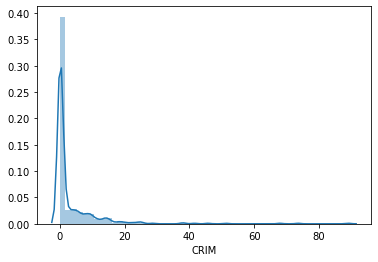

In [84]:
sns.distplot(boston['CRIM'])

##### From the above distribution plot we can see that data in CRIM column is Right Skewed. So, I tried to do some feature engineering in that column by applying log. So that data somewhat becomes Normally Distributed.
The Codes for log conversion is given below

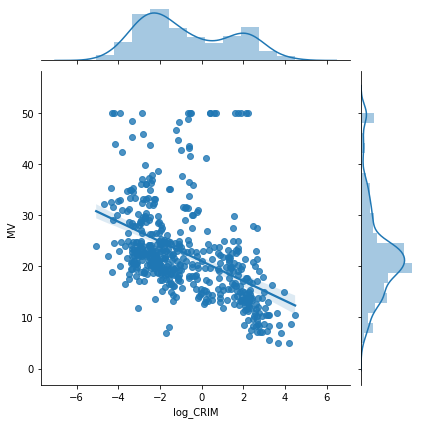

In [86]:
boston['log_CRIM'] = np.log(boston['CRIM'])

#boston.hist('log_DIS',figsize=(8,5))
#plt.title('MV vs log(CRIM)')
#plt.ylabel('MV')
#plt.xlabel("log(CRIM)")
#sns.distplot(boston['log_CRIM'])
sns.jointplot(x="log_CRIM", y="MV", data=boston, kind="reg");

In [87]:
boston.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PT', 'B', 'MV',
       'log_CRIM'],
      dtype='object')

In [88]:
import statsmodels.formula.api as smf

In [89]:
r_style_model = smf.ols('MV~INDUS+NOX+RM+AGE+DIS+TAX+PT+B+log_CRIM', data=boston)

In [90]:
result = r_style_model.fit()

In [91]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     104.7
Date:                Sun, 14 Jun 2020   Prob (F-statistic):          1.12e-108
Time:                        23:53:03   Log-Likelihood:                -1571.0
No. Observations:                 506   AIC:                             3162.
Df Residuals:                     496   BIC:                             3204.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.8260      5.549      2.852      0.0

#### From the above r_style_model summary we can see converting CRIM to log_CRIM was not a good idea. As we can see 'INDUS', 'TAX', 'log_CRIM' are not significant. So Therefore we will not do any conversion for this model.

##### We should check for VIF(Variation Inflation Factor) for Multicollinearity.

In [92]:
print('MAE',metrics.mean_absolute_error(Y_test,predictions))
print('MSE',metrics.mean_squared_error(Y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE 3.462822477847541
MSE 24.27335682897541
RMSE 4.926799856801107


Text(0, 0.5, 'Predicted_Y')

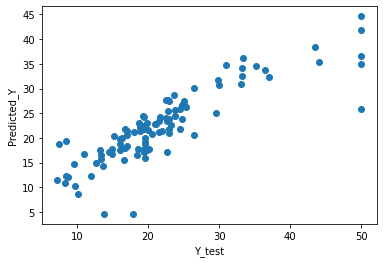

In [93]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y_test')
plt.ylabel('Predicted_Y')

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
X = add_constant(boston)
vifs = [vif(X.values, i) for i in range(len(X.columns))]
pd.Series(data=vifs, index=X.columns).sort_values(ascending=False)

const      555.66464
log_CRIM     6.57094
NOX          5.01743
TAX          4.07314
INDUS        3.63758
DIS          3.60506
MV           3.00640
AGE          2.84580
RM           2.07590
CRIM         2.03490
PT           1.73487
B            1.39259
dtype: float64

As we can see All predictors haave VIF Score > 5 which says that there is High Multicollinearity in Data if we use log_CRIM. 

In [95]:
boston.drop(['TAX'],axis=1,inplace=True)

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
X = add_constant(boston)
vifs = [vif(X.values, i) for i in range(len(X.columns))]
pd.Series(data=vifs, index=X.columns).sort_values(ascending=False)

const      555.65348
log_CRIM     5.20020
NOX          4.97234
DIS          3.53016
INDUS        3.26255
MV           3.00326
AGE          2.79545
RM           2.05454
CRIM         2.01527
PT           1.64934
B            1.38808
dtype: float64

In [97]:
boston.drop(['INDUS'],axis=1,inplace=True)

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
X = add_constant(boston)
vifs = [vif(X.values, i) for i in range(len(X.columns))]
pd.Series(data=vifs, index=X.columns).sort_values(ascending=False)

const      554.33758
log_CRIM     5.03367
NOX          4.62404
DIS          3.31717
MV           2.98545
AGE          2.79537
RM           2.02887
CRIM         1.99898
PT           1.60162
B            1.38696
dtype: float64

We can see that VIF score of log_CRIM has value greater than 5 so converting CRIM to log_CRIm wasn't a great idea. 

References:
   1. https://canvas.uchicago.edu/courses/25628/modules/items/905064
   2. https://seaborn.pydata.org/tutorial/regression.html
   3. https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/